#### Example of transforming a term-document matrix using TFxIDF (Term Frequency x Inverse Document Frequency)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv("../../data/term-doc-mat.csv", header=None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [3]:
# Let's remove the column containing the terms
# TD will be out term x document matrix
TD = Data.iloc[:,1:]
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
# Reindex the columns to start from 0
# because we don't like to start with a 1
TD.columns= range(15)
TD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [5]:
# The list of our index terms
# get the shape of our terms
terms = Data.iloc[:,0]
terms

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

In [6]:
TD.shape

(10, 15)

In [7]:
numTerms=TD.shape[0]
NDocs = TD.shape[1]

In [8]:
print(numTerms)
print(NDocs)

10
15


#### Next, let's compute term frequencies to get an idea of their distributions across the corpus.

### We are adding up the terms' frequency across the columns i.e., documents. e.g., database appears 133 times in the corpus (all our documents)

In [9]:
termFreqs = TD.sum(axis=1) # we are adding in the column direction
termFreqs

# for database, it is 133
# we are getting how often the term appeared in our corpus (all documents)

0    133
1     99
2     61
3    114
4     90
5     84
6    123
7     62
8     86
9    129
dtype: int64

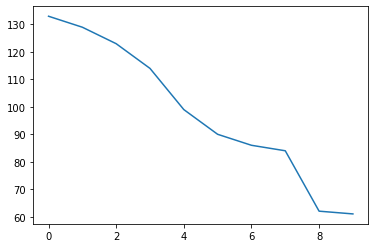

In [10]:
plt.plot(sorted(termFreqs, reverse=True))
plt.show()

## we do have some documents that appear alot but there is not a very big exponential difference between these.

#### Next, we will transform the data to TFxIDF weights:

In [11]:
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term

DF = pd.DataFrame([(TD!=0).sum(1)]).T # we are checking where a term is not non zero and summing it along the column direction. 
DF

,0
0,10
1,11
2,8
3,10
4,9
5,8
6,5
7,9
8,6
9,12


In [12]:
# Create a matrix with all entries = NDocs
# we are creating a matrix with a shape of TD and we are filling it with a number of Docs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]]


In [13]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

# we are going to divide NMatrix by DF.
# it is the inverse document frequency then we are going to take the log 2 of that.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [14]:
print(IDF)

[[0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32]
 [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]]


In [15]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [16]:
pd.set_option("display.precision", 2)

TD_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.04,18.72,7.02,3.51,25.15,1.17,0.00,1.75,0.58,3.51,2.34,0.00,0.00,0.00,0.00
1,4.03,2.24,2.24,0.89,8.95,0.00,0.45,0.00,0.00,0.00,12.08,6.26,1.34,0.89,4.92
2,0.00,2.72,0.00,0.00,2.72,6.35,10.88,3.63,24.49,3.63,0.00,0.91,0.00,0.00,0.00
3,1.75,0.00,0.00,0.00,0.00,9.36,0.00,1.17,14.62,13.45,4.09,7.02,12.28,1.75,1.17
4,0.74,0.00,0.00,0.00,0.00,24.32,1.47,0.00,5.16,8.84,10.32,3.68,8.84,2.95,0.00
5,10.88,1.81,0.00,0.00,24.49,0.00,0.00,0.00,0.00,19.95,8.16,3.63,0.00,4.53,2.72
6,0.00,0.00,0.00,0.00,0.00,28.53,50.72,34.87,53.89,26.94,0.00,0.00,0.00,0.00,0.00
7,0.74,0.00,0.00,0.00,1.47,0.00,0.00,0.00,2.21,6.63,19.90,5.16,3.68,2.95,2.95
8,27.76,13.22,21.15,9.25,40.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.00
9,0.64,0.00,0.00,0.64,0.00,8.69,1.29,0.64,3.54,2.58,10.62,5.15,4.51,2.25,0.97


#### Let's now repeat the k-nearest-neighbor document retrieval example from earier notebook, but this time, we'll use the TFxIDF weighted document vectors.

In [17]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

#### Let's now try this on a new query object as a test instance

In [18]:
x = np.array([3, 22, 0, 17, 9, 6, 1, 12, 0, 22])

#### Need to also perform TFxIDF transformation on the query

In [19]:
# Each term in query x must be multiplied by the idf value of the term we computed earlier (the IDF matrix)
x_tfidf = x * IDF.T[0]  # note that this coordinatewise multiplication of two vectors
print(x_tfidf)

[1.75 9.84 0.   9.94 6.63 5.44 1.58 8.84 0.   7.08]


In [20]:
# The KNN Search function expects a document x term matrix as an np array, so we need to transpose the TF_tfidf matrix

# Now remember we had term by document, we didn't have document by term so remember you have to transpose it to document by term 
# becuase that is your features

# then you to convert it to a numpy array
DT_tfidf = TD_tfidf.T
DT_array = np.array(DT_tfidf)  # then you to convert it to a numpy array

In [21]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
neigh_idx, distances = knn_search(x_tfidf, DT_array, 5, 1)

In [22]:
distances = pd.Series(distances, index=DT_tfidf.index)
distances.sort_values()

# document 11 was the first closest distance
# document 10 was the second closest distance
# e.t.c

11    0.01
10    0.10
14    0.18
13    0.20
12    0.21
9     0.44
5     0.55
4     0.75
8     0.75
0     0.77
1     0.86
7     0.89
6     0.90
3     0.90
2     0.92
dtype: float64

In [23]:
print("Query:", x)
print("\nNeighbors:")
DT_tfidf.iloc[neigh_idx] # what documents they actually belong to 

Query: [ 3 22  0 17  9  6  1 12  0 22]

Neighbors:


,0,1,2,3,4,5,6,7,8,9
11,0.00,6.26,0.91,7.02,3.68,3.63,0.0,5.16,0.00,5.15
10,2.34,12.08,0.00,4.09,10.32,8.16,0.0,19.90,0.00,10.62
14,0.00,4.92,0.00,1.17,0.00,2.72,0.0,2.95,0.00,0.97
13,0.00,0.89,0.00,1.75,2.95,4.53,0.0,2.95,1.32,2.25
12,0.00,1.34,0.00,12.28,8.84,0.00,0.0,3.68,0.00,4.51


#### If you compare this result to the one from the previous notebook (where we did not use TFxIDF), you'll note that document 12 was demoted in the new ranking (it was previously in the 3rd position). This is likely because this document matched strongly with the query on terms 3 and 9. Both of these terms occur frequently across the documents and so the TFxIDF transformation resulted in their weights being penalized.

#### Next, let's extend this example to classification using the KNN approach. 

In [24]:
# Let's add some labels to our original data

# we make labels or classes as shown below in  the numpy array
cat_labels = np.array(["Databases", "Databases", "Databases", "Databases", "Databases", "Regression", "Regression", "Regression", "Regression", "Regression", "Information Retrieval", "Information Retrieval", "Information Retrieval", "Information Retrieval", "Information Retrieval"])
cat_labels = pd.Series(cat_labels, index=DT_tfidf.index)

DT_tfidf["Category"] = cat_labels

DT_tfidf

,0,1,2,3,4,5,6,7,8,9,Category
0,14.04,4.03,0.00,1.75,0.74,10.88,0.00,0.74,27.76,0.64,Databases
1,18.72,2.24,2.72,0.00,0.00,1.81,0.00,0.00,13.22,0.00,Databases
2,7.02,2.24,0.00,0.00,0.00,0.00,0.00,0.00,21.15,0.00,Databases
3,3.51,0.89,0.00,0.00,0.00,0.00,0.00,0.00,9.25,0.64,Databases
4,25.15,8.95,2.72,0.00,0.00,24.49,0.00,1.47,40.98,0.00,Databases
5,1.17,0.00,6.35,9.36,24.32,0.00,28.53,0.00,0.00,8.69,Regression
6,0.00,0.45,10.88,0.00,1.47,0.00,50.72,0.00,0.00,1.29,Regression
7,1.75,0.00,3.63,1.17,0.00,0.00,34.87,0.00,0.00,0.64,Regression
8,0.58,0.00,24.49,14.62,5.16,0.00,53.89,2.21,0.00,3.54,Regression
9,3.51,0.00,3.63,13.45,8.84,19.95,26.94,6.63,0.00,2.58,Regression


#### The function below will use our previous knn_search function to identify the label/category for for an instance x to be classifed, using the majority label of the K nearest neighbors of x.

In [25]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    print("Labels for top ", K, "neighbors: ", count)
    return count.most_common(1)[0][0]

In [26]:
print("Instance to classify:\n", x)
print("Predicted Category for the new instance: ", knn_classify(x_tfidf, DT_array, 5, cat_labels, 1))

Instance to classify:
 [ 3 22  0 17  9  6  1 12  0 22]
Labels for top  5 neighbors:  Counter({'Information Retrieval': 5})
Predicted Category for the new instance:  Information Retrieval
